Задание 6.12

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Номер 1

In [2]:
# Параметры
N = 102  # Количество сигналов
n = 100  # Количество точек в каждом сигнале
max_error = 0.2  # Максимальная погрешность

# Генерация нормальных сигналов
mean = 0
std_dev = 1
normal_signals = np.random.normal(mean, std_dev, (N, n))

# Нормализация для нулевого математического ожидания и единичной дисперсии
normal_signals = (normal_signals - np.mean(normal_signals, axis=1, keepdims=True)) / np.std(normal_signals, axis=1, keepdims=True)

# Добавление случайной погрешности
normal_signals += np.random.uniform(-max_error, max_error, normal_signals.shape)

# Генерация равномерных сигналов
uniform_signals = np.random.uniform(-0.5, 0.5, (N, n))

# Нормализация для нулевого математического ожидания и единичной дисперсии
uniform_signals = (uniform_signals - np.mean(uniform_signals, axis=1, keepdims=True)) / np.std(uniform_signals, axis=1, keepdims=True)

# Добавление случайной погрешности
uniform_signals += np.random.uniform(-max_error, max_error, uniform_signals.shape)

# Генерация экспоненциальных сигналов
exponential_signals = np.random.exponential(1, (N, n))

# Нормализация для нулевого математического ожидания и единичной дисперсии
exponential_signals = (exponential_signals - np.mean(exponential_signals, axis=1, keepdims=True)) / np.std(exponential_signals, axis=1, keepdims=True)

# Добавление случайной погрешности
exponential_signals += np.random.uniform(-max_error, max_error, exponential_signals.shape)

# Теперь у нас есть три набора сигналов: normal_signals, uniform_signals и exponential_signals

#Номер 2

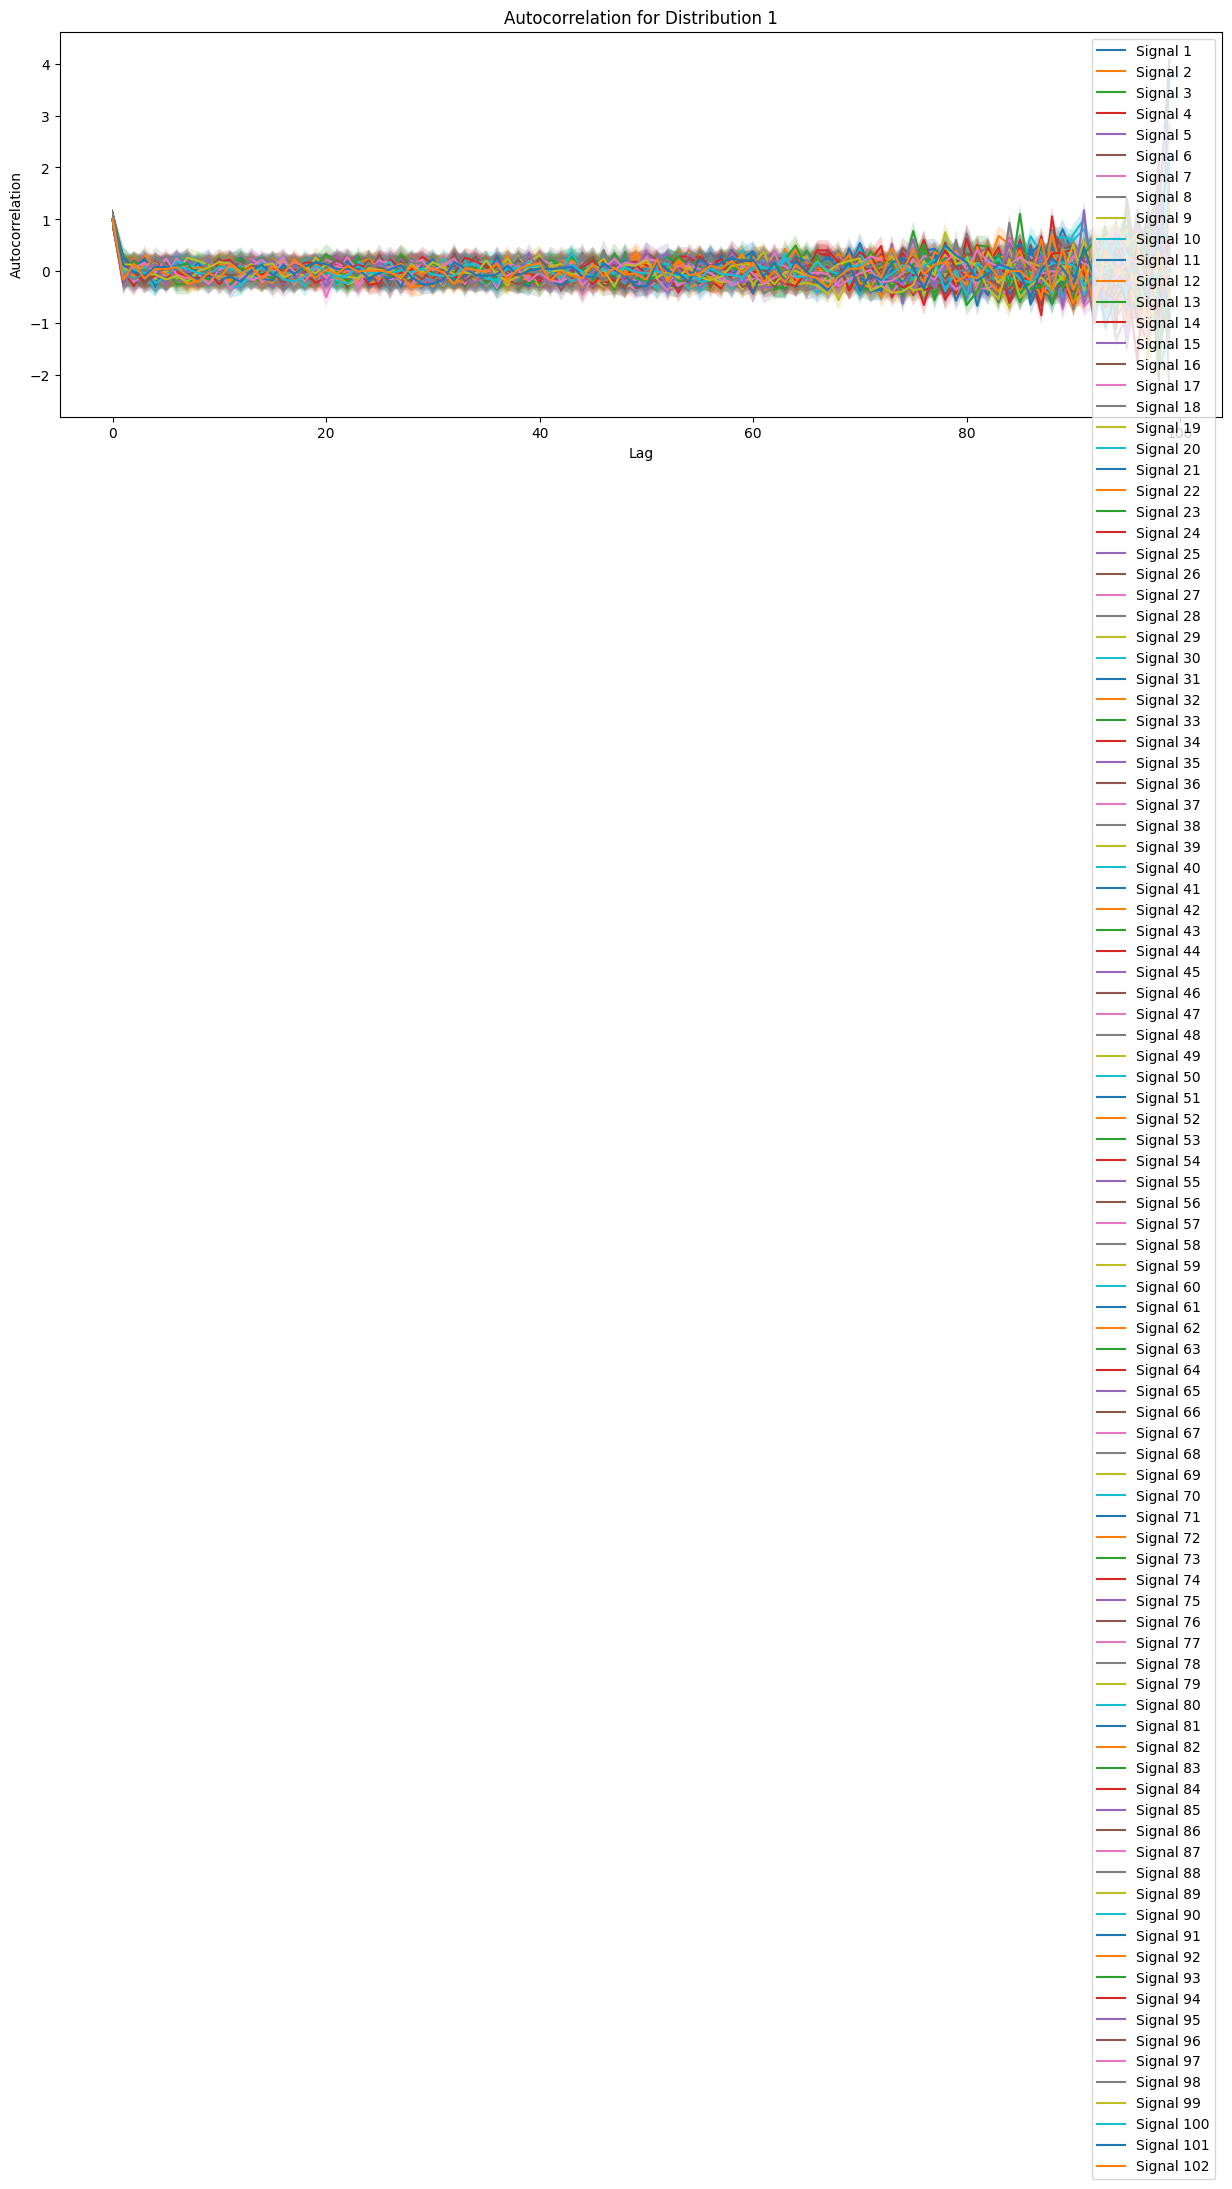

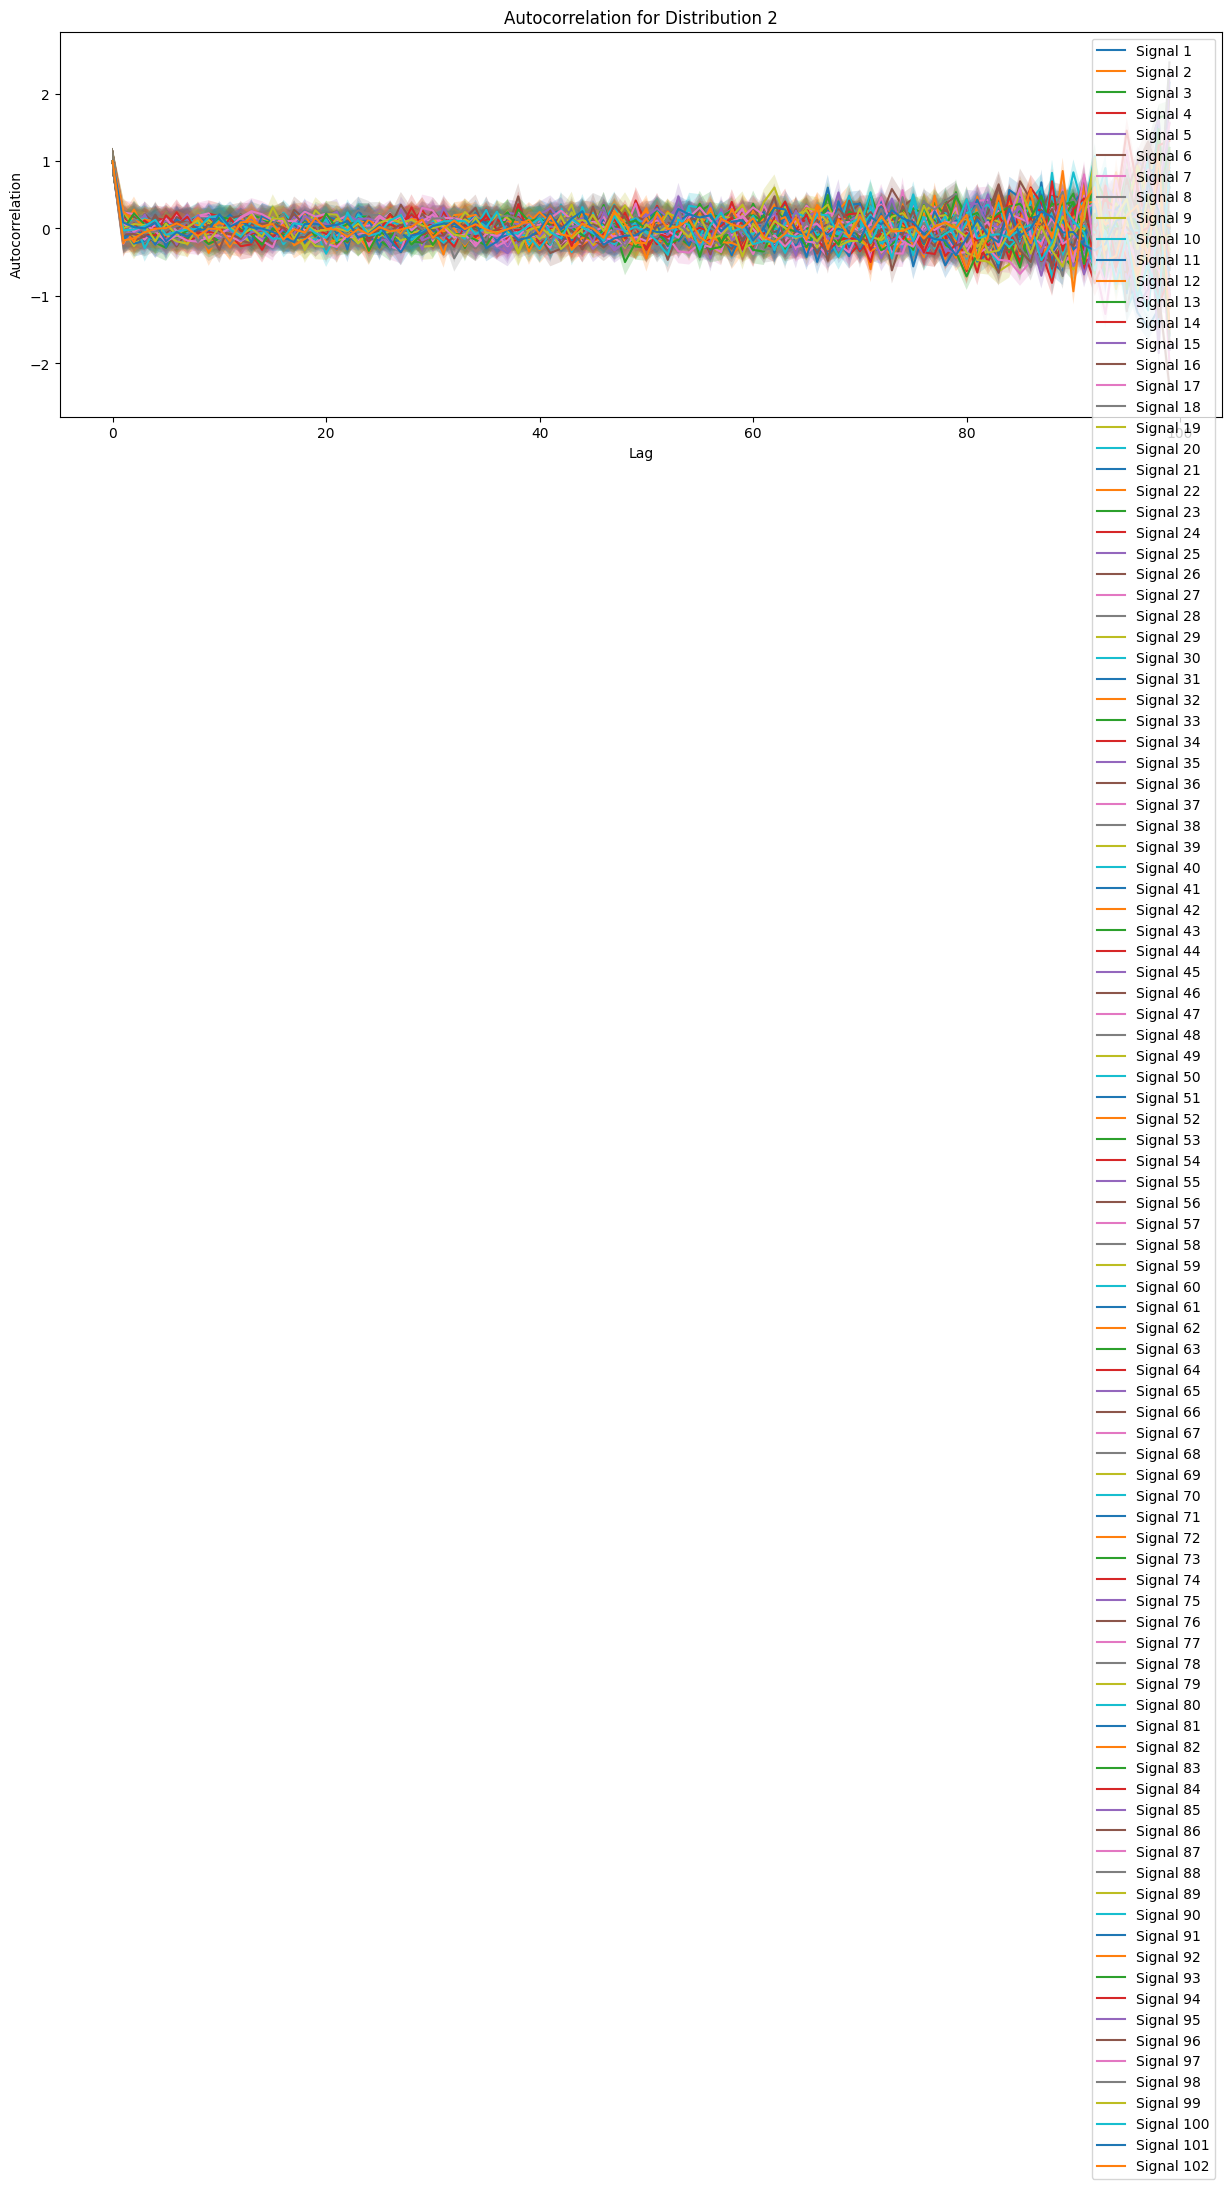

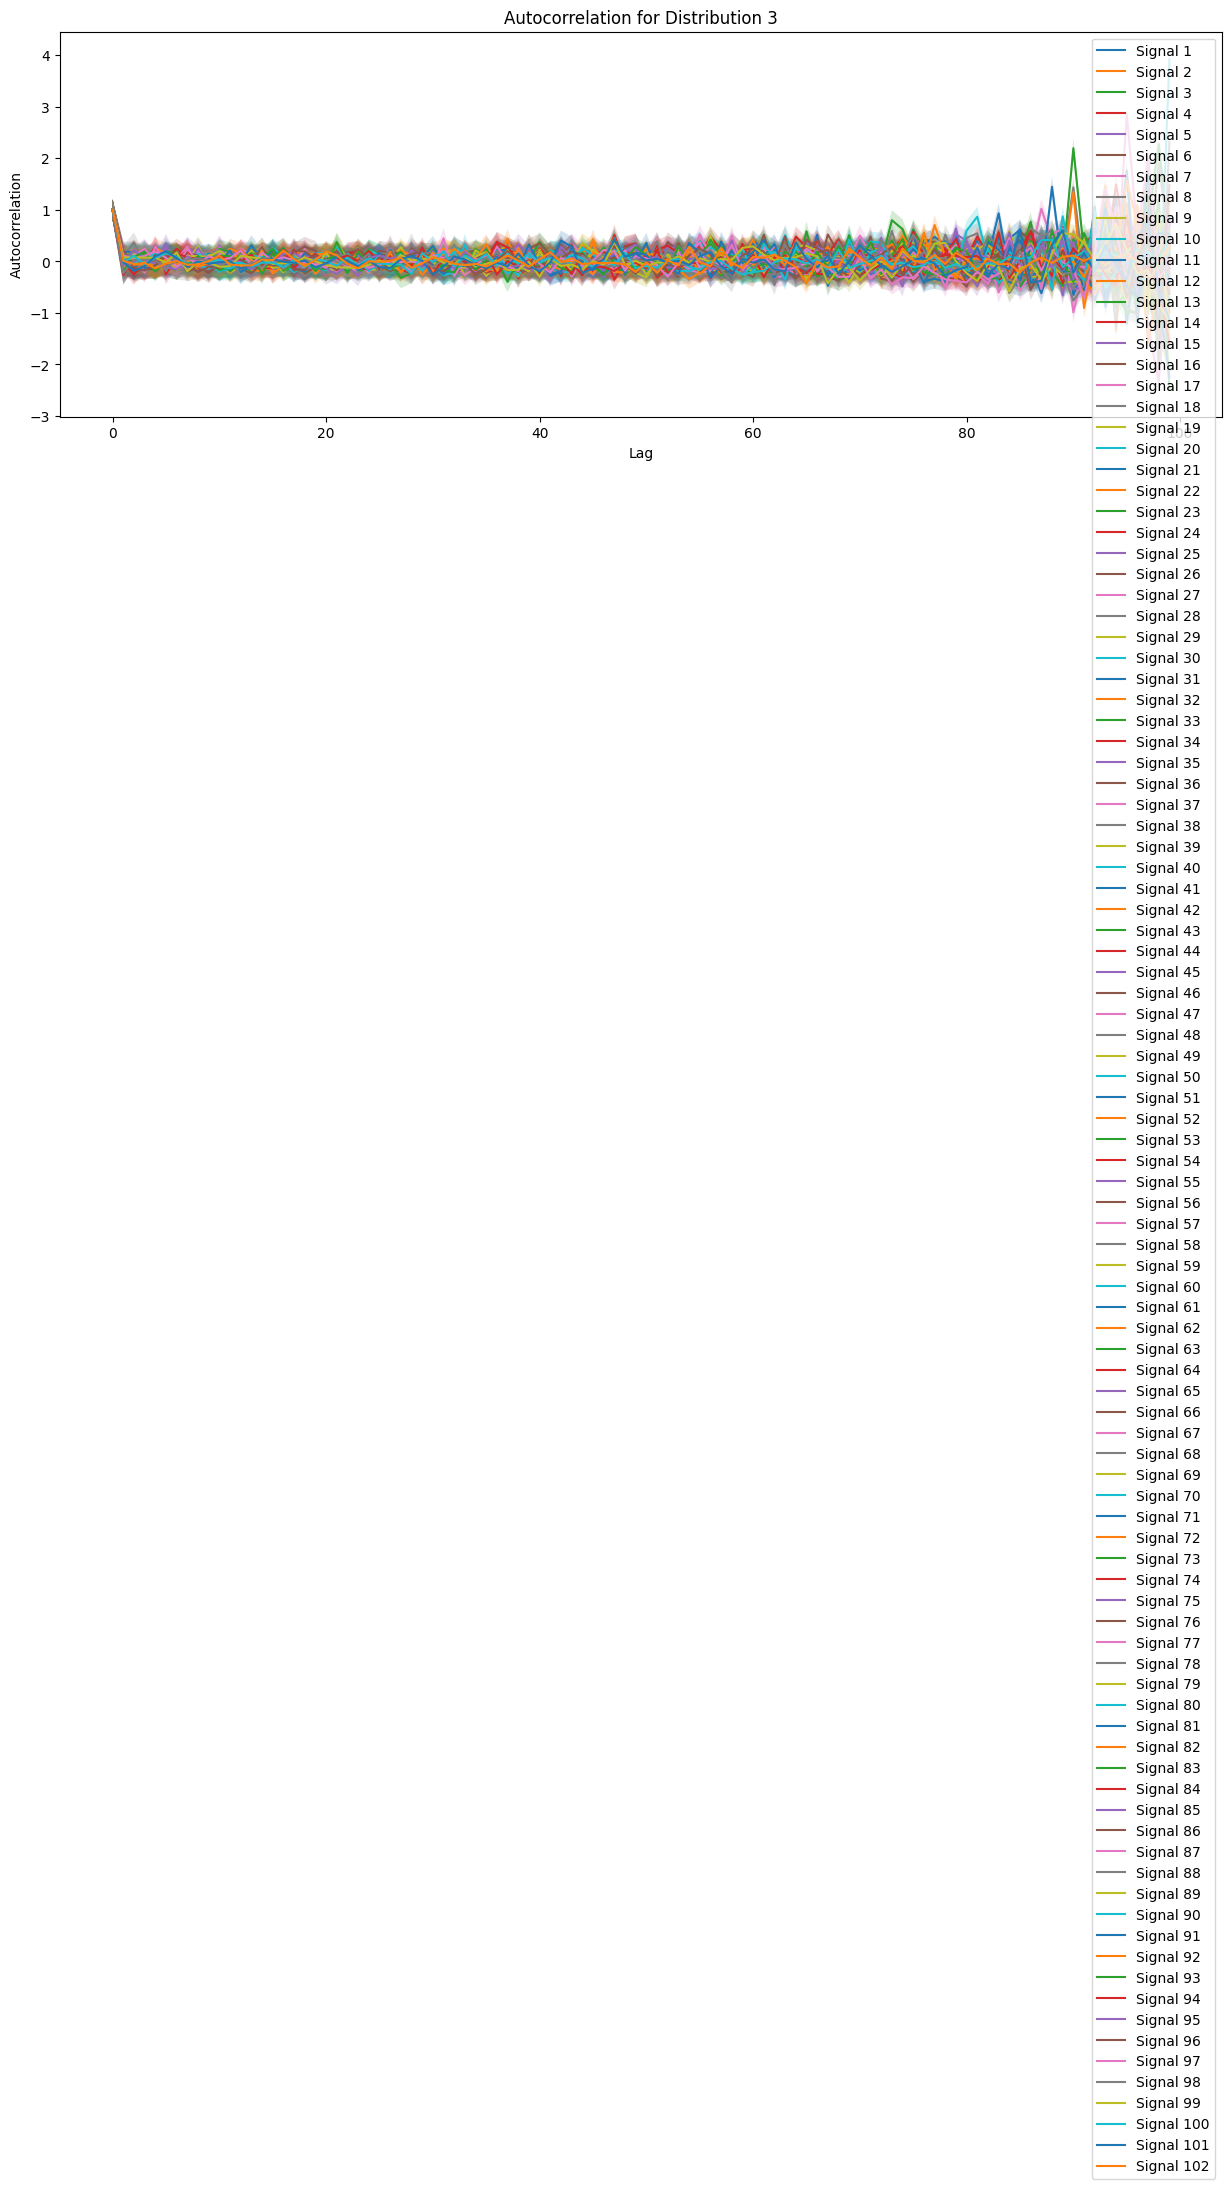

In [3]:
def autocorr(signal):
    n = len(signal)
    variance = np.var(signal)
    mean = np.mean(signal)
    c0 = np.sum((signal - mean)**2) / n  # Дисперсия
    autocorr_values = np.correlate(signal - mean, signal - mean, mode='full')[-n:]
    return autocorr_values / (c0 * np.arange(n, 0, -1))  # Нормализация

def confidence_intervals(autocorr_values, alpha=0.05):
    n = len(autocorr_values)
    z = 1.96  # Для 95% доверительного интервала
    se = z * np.sqrt((1 + 2 * np.sum(autocorr_values[1:n]) / n) / n)
    return autocorr_values - se, autocorr_values + se

# Автокорреляция для каждого из сигналов
signals = [normal_signals, uniform_signals, exponential_signals]
autocorr_collection = []

for signal_group in signals:
    autocorr_group = []
    for signal in signal_group:
        autocorr_values = autocorr(signal)
        autocorr_group.append(autocorr_values)
    autocorr_collection.append(autocorr_group)

# Построение доверительных интервалов
conf_intervals_collection = []
for autocorr_group in autocorr_collection:
    conf_intervals_group = []
    for autocorr_values in autocorr_group:
        conf_intervals_group.append(confidence_intervals(autocorr_values))
    conf_intervals_collection.append(conf_intervals_group)

# Визуализация автокорреляционных функций и их доверительных интервалов
for index, (autocorr_group, conf_intervals_group) in enumerate(zip(autocorr_collection, conf_intervals_collection)):
    plt.figure(figsize=(15, 5))
    for i, (autocorr_values, (lower, upper)) in enumerate(zip(autocorr_group, conf_intervals_group)):
        plt.plot(autocorr_values, label=f'Signal {i+1}')
        plt.fill_between(range(len(autocorr_values)), lower, upper, alpha=0.2)
    plt.title(f'Autocorrelation for Distribution {index+1}')
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.legend()
    plt.show()

#Номер 3

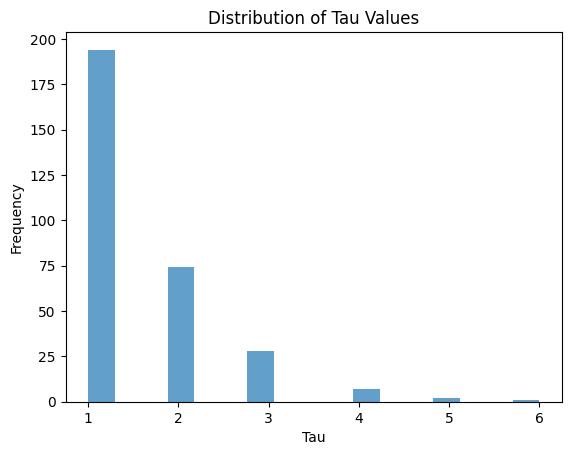

In [4]:
def find_tau_threshold(autocorr_values, threshold=0.1):
    for tau in range(1, len(autocorr_values)):
        if abs(autocorr_values[tau]) < threshold:
            return tau
    return None

tau_values = []

for autocorr_group in autocorr_collection:
    for autocorr_values in autocorr_group:
        tau = find_tau_threshold(autocorr_values)
        tau_values.append(tau)

# Построение функции распределения значений tau
plt.hist(tau_values, bins='auto', alpha=0.7)
plt.title('Distribution of Tau Values')
plt.xlabel('Tau')
plt.ylabel('Frequency')
plt.show()

#ДЗ(номер4)

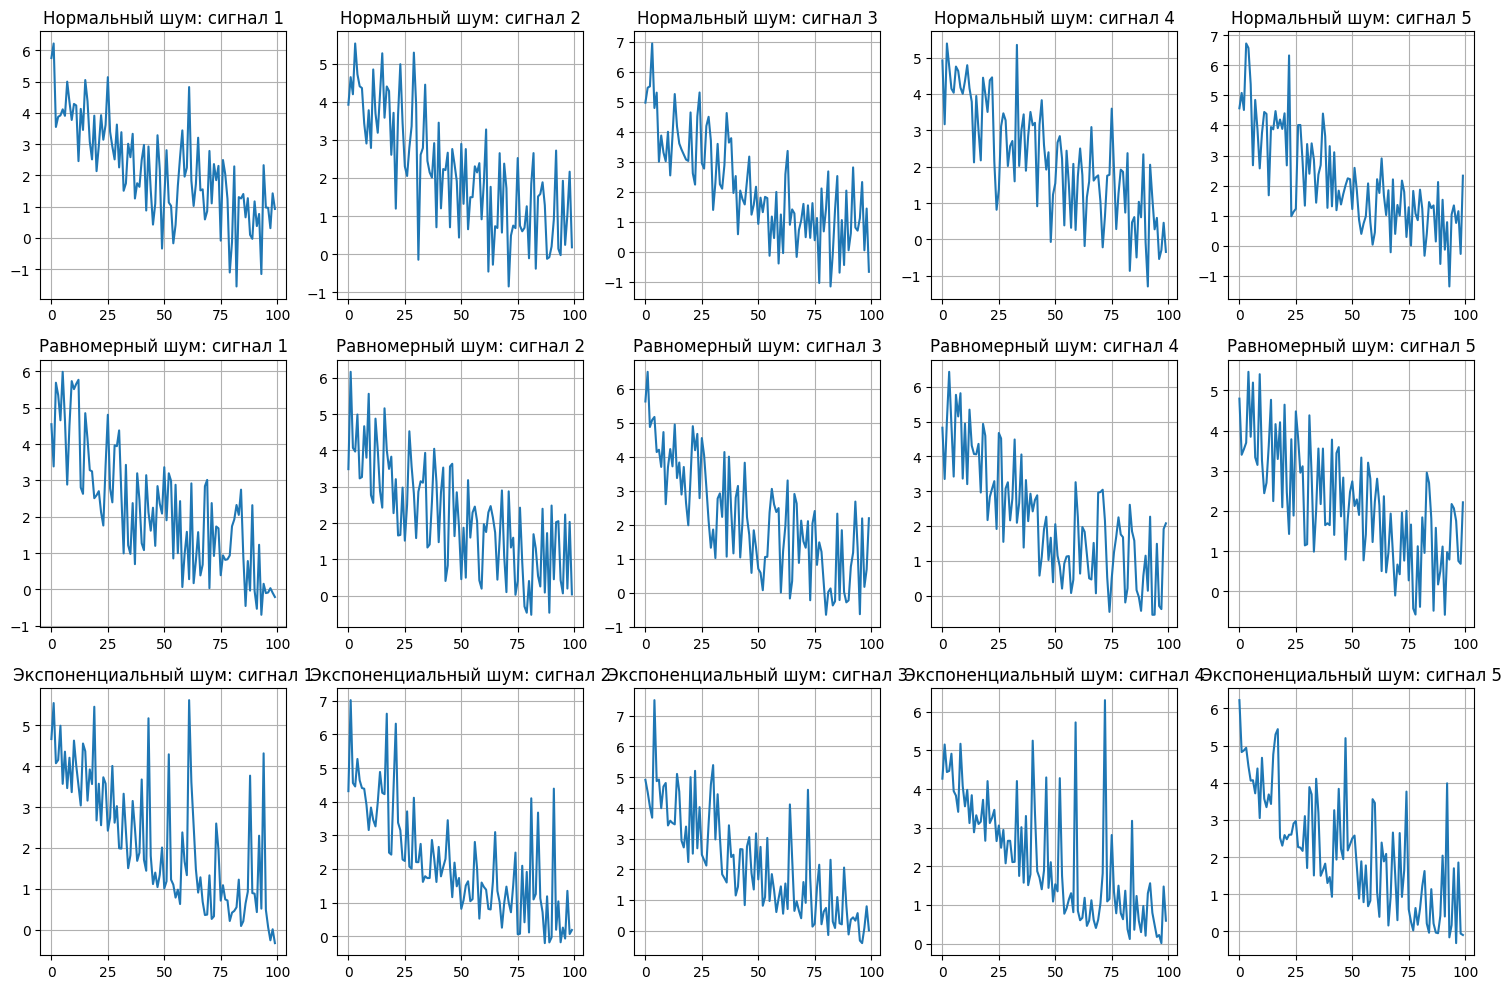

In [5]:
# Параметры
N = 102  # Количество сигналов
n = 100  # Количество точек в каждом сигнале
max_error = 0.2  # Максимальная погрешность

# Параметры времени
t = np.arange(0, n, 1)  # Временные моменты ti = 0, 1, 2, ..., n-1

# Генерация основного сигнала x(t) = 5 * exp(-2t/n)
signal = 5 * np.exp(-2 * t / n)

# Генерация и наложение нормального шума
normal_noise = np.random.normal(0, 1, (N, n))  # Генерация нормального шума
normal_noise = (normal_noise - np.mean(normal_noise, axis=1, keepdims=True)) / np.std(normal_noise, axis=1, keepdims=True)
normal_noise += np.random.uniform(-max_error, max_error, normal_noise.shape)  # Добавление случайной погрешности

# Создание сигналов с нормальным шумом
normal_signals = signal + normal_noise

# Генерация и наложение равномерного шума
uniform_noise = np.random.uniform(-0.5, 0.5, (N, n))  # Генерация равномерного шума
uniform_noise = (uniform_noise - np.mean(uniform_noise, axis=1, keepdims=True)) / np.std(uniform_noise, axis=1, keepdims=True)
uniform_noise += np.random.uniform(-max_error, max_error, uniform_noise.shape)  # Добавление случайной погрешности

# Создание сигналов с равномерным шумом
uniform_signals = signal + uniform_noise

# Генерация и наложение экспоненциального шума
exponential_noise = np.random.exponential(1, (N, n))  # Генерация экспоненциального шума
exponential_noise = (exponential_noise - np.mean(exponential_noise, axis=1, keepdims=True)) / np.std(exponential_noise, axis=1, keepdims=True)
exponential_noise += np.random.uniform(-max_error, max_error, exponential_noise.shape)  # Добавление случайной погрешности

# Создание сигналов с экспоненциальным шумом
exponential_signals = signal + exponential_noise

# Визуализация первых 5 сигналов с наложением шумов
plt.figure(figsize=(15, 10))

for i in range(5):
    plt.subplot(3, 5, i + 1)
    plt.plot(t, normal_signals[i])
    plt.title('Нормальный шум: сигнал {}'.format(i + 1))
    plt.grid()

for i in range(5):
    plt.subplot(3, 5, i + 6)
    plt.plot(t, uniform_signals[i])
    plt.title('Равномерный шум: сигнал {}'.format(i + 1))
    plt.grid()

for i in range(5):
    plt.subplot(3, 5, i + 11)
    plt.plot(t, exponential_signals[i])
    plt.title('Экспоненциальный шум: сигнал {}'.format(i + 1))
    plt.grid()

plt.tight_layout()
plt.show()